In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import h5py
import cPickle as pickle

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [5]:
from ToyMC.utils.Utils import is_logarithmic

In [18]:
LEVEL = 0
NAME = '14500'
INFILE = NAME+'.pkl'
WEIGHT_FILE = NAME+'_weights.hdf5'
X_PARMS = ['Ws']
X_LABEL = 'Ws'
Y_PARMS = ['nfpip', 'nfpim', 'nfkp', 'nfkm', 'nfpi0', 'nfk0']
#BINNING = np.logspace(0, 3, 100)
BINNING =np.linspace(0, 4, 100)

In [7]:
infile = '/data/icecube/data/mlarson/level7_24Nov2015/GENIE_parms/level'+str(LEVEL)+'/'+INFILE
inweights = '/data/icecube/data/mlarson/level7_24Nov2015/GENIE_parms/level'+str(LEVEL)+'/'+WEIGHT_FILE
input_file = pickle.load(open(infile, 'rb'))
if '16' in NAME:
    weights = np.ones(len(input_file['cc']))
else:
    weights = np.array(h5py.File(inweights, 'r')['weights'][:])

In [8]:
print(sorted(input_file.keys()))
print(weights.shape)

['A', 'Ef', 'Ei', 'El', 'En', 'Ev', 'KEf', 'KEl', 'Q2', 'Q2s', 'W', 'Ws', 'Z', '_azimax', '_azimin', '_elogmax', '_elogmin', '_glbprbscale', '_gvold', '_gvoll', '_gvolr', '_ngennu', '_plawind', '_zenmax', '_zenmin', 'calresp0', 'cc', 'charm', 'coh', 'dfr', 'diffxsec', 'dis', 'em', 'energy', 'hitnuc', 'hitqrk', 'iev', 'imd', 'nc', 'neu', 'neut_code', 'nf', 'nfem', 'nfk0', 'nfkm', 'nfkp', 'nfn', 'nfother', 'nfp', 'nfpi0', 'nfpim', 'nfpip', 'ni', 'niem', 'nik0', 'nikm', 'nikp', 'nin', 'niother', 'nip', 'nipi0', 'nipim', 'nipip', 'nuance_code', 'nuel', 'pdgf', 'pdgi', 'pdgl', 'prob', 'pxf', 'pxi', 'pxl', 'pxn', 'pxv', 'pyf', 'pyi', 'pyl', 'pyn', 'pyv', 'pzf', 'pzi', 'pzl', 'pzn', 'pzv', 'qel', 'res', 'resc', 'resid', 'rw_AhtBY', 'rw_BhtBY', 'rw_CV1uBY', 'rw_CV2uBY', 'rw_MaCCQE', 'rw_MaCCRES', 'rw_MaCOHpi', 'rw_MaNCEL', 'rw_MaNCRES', 'sea', 't', 'tgt', 'tgtmass', 'ts', 'vtxt', 'vtxx', 'vtxy', 'vtxz', 'wght', 'x', 'xs', 'xsec', 'y', 'ys']
(440901,)


In [9]:
if not np.sum(weights) == len(input_file['cc']):
    weights *= 3600 * 24 * 365.
    if LEVEL == 0:
        weights /= 3.
    elif LEVEL == 7:
        if '12585' in INFILE:
            weights /= 275.
        elif '14585' in INFILE:
            weights /= 245.
else:
    print(weights)

[ 1.  1.  1. ...,  1.  1.  1.]


In [10]:
def make_plot_stack(hist, tot_hist, ylabel, outname):
    names = ['qel', 'res', 'dis']
    colours = ['blue', 'green', 'red']

    fig = plt.figure(figsize=[10, 7])
    if LEVEL == 0:
        fig.suptitle('Level0 (Generator level) '+NAME, y=1.005)
    elif LEVEL == 7:
        fig.suptitle('Level7 (Final level) '+NAME, y=1.005)
    gs = gridspec.GridSpec(1, 1)
    gs0 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0], hspace=0, height_ratios=[1] )
    
    ax0 = fig.add_subplot(gs0[0])
    ax0.set_xlabel(X_LABEL, size=18)
    ax0.set_xlim(np.min(BINNING), np.max(BINNING))
    ax0.set_ylim([0, 6])
    if is_logarithmic(BINNING):
        ax0.set_xscale('log')
    #ax0.set_yscale('log')
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    ax0.set_ylabel(ylabel, size=18)
    
    tot_hist_0 = np.concatenate(([tot_hist[0]], tot_hist))
    ax0.step(
        BINNING, tot_hist_0, alpha=0.8, color='black', drawstyle='steps-mid', label='all', linewidth=2, linestyle=':'
    )

    for idx, x in enumerate(hist):
        x = np.concatenate(([x[0]], x))
        p = ax0.step(
            BINNING, x, alpha=1.0, color=colours[idx], drawstyle='steps-mid', label=names[idx], linewidth=1.4, linestyle='-'
        )

    ax0.legend()

    fig.tight_layout()
    # fig.savefig('./test.pdf', bbox_inches='tight')
    fig.savefig(outname, bbox_inches='tight')

0 nan values


/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in divide


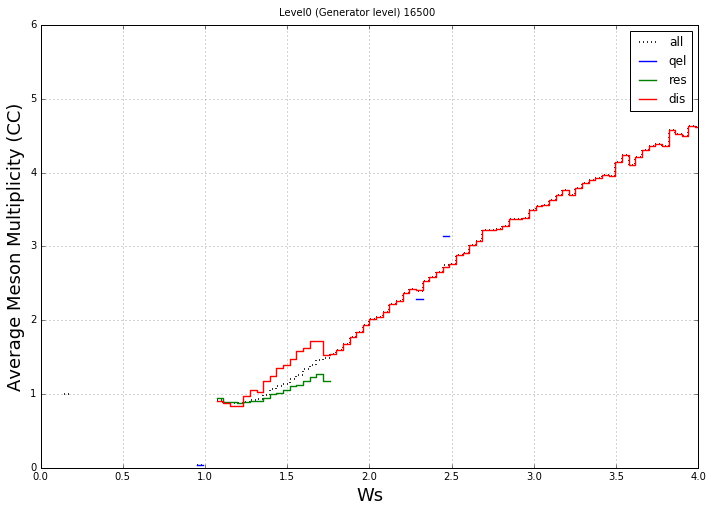

In [19]:
parm_array = np.zeros(len(input_file['cc']))
y_array = np.zeros(len(input_file['cc']))
for x in X_PARMS:
    parm_array += input_file[x]
nan_mask = np.isnan(parm_array)
for y in Y_PARMS:
    y_array += input_file[y]
nan_mask = nan_mask | np.isnan(y_array)
print('{0} nan values'.format(np.sum(nan_mask)))
cc_mask = input_file['cc'].astype(bool)
tot_mask = [~nan_mask & cc_mask]
dis_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['dis'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['dis'][tot_mask]]
)
dis_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['dis'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['dis'][tot_mask]]*(y_array[tot_mask])[input_file['dis'][tot_mask]]
)
res_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['res'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['res'][tot_mask]]
)
res_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['res'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['res'][tot_mask]]*(y_array[tot_mask])[input_file['res'][tot_mask]]
)
qel_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['qel'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['qel'][tot_mask]]
)
qel_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['qel'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['qel'][tot_mask]]*(y_array[tot_mask])[input_file['qel'][tot_mask]]
)
all_hist, edges = np.histogram(
    parm_array[tot_mask], bins=BINNING,
    weights=weights[tot_mask]
)
all_hist_y, edges = np.histogram(
    parm_array[tot_mask], bins=BINNING,
    weights=weights[tot_mask]*y_array[tot_mask]
)
res_hist_avg = res_hist_y / res_hist.astype(float)
dis_hist_avg = dis_hist_y / dis_hist.astype(float)
qel_hist_avg = qel_hist_y / qel_hist.astype(float)
all_hist_avg = all_hist_y / all_hist.astype(float)
outfile = './images/level'+str(LEVEL)+'/'+X_LABEL+'/'+NAME+'_cc'
make_plot_stack((qel_hist_avg, res_hist_avg, dis_hist_avg), all_hist_avg, r'Average Meson Multiplicity (CC)', outfile+'_multiplicity.png')

0 nan values


/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in divide


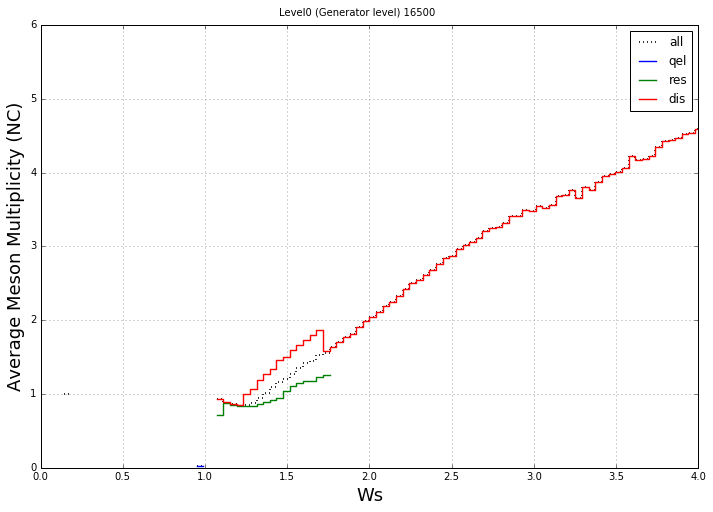

In [20]:
parm_array = np.zeros(len(input_file['cc']))
y_array = np.zeros(len(input_file['cc']))
for x in X_PARMS:
    parm_array += input_file[x]
nan_mask = np.isnan(parm_array)
for y in Y_PARMS:
    y_array += input_file[y]
nan_mask = nan_mask | np.isnan(y_array)
print('{0} nan values'.format(np.sum(nan_mask)))
nc_mask = input_file['nc'].astype(bool)
tot_mask = [~nan_mask & nc_mask]
dis_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['dis'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['dis'][tot_mask]]
)
dis_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['dis'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['dis'][tot_mask]]*(y_array[tot_mask])[input_file['dis'][tot_mask]]
)
res_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['res'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['res'][tot_mask]]
)
res_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['res'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['res'][tot_mask]]*(y_array[tot_mask])[input_file['res'][tot_mask]]
)
qel_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['qel'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['qel'][tot_mask]]
)
qel_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['qel'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['qel'][tot_mask]]*(y_array[tot_mask])[input_file['qel'][tot_mask]]
)
all_hist, edges = np.histogram(
    parm_array[tot_mask], bins=BINNING,
    weights=weights[tot_mask]
)
all_hist_y, edges = np.histogram(
    parm_array[tot_mask], bins=BINNING,
    weights=weights[tot_mask]*y_array[tot_mask]
)
res_hist_avg = res_hist_y / res_hist.astype(float)
dis_hist_avg = dis_hist_y / dis_hist.astype(float)
qel_hist_avg = qel_hist_y / qel_hist.astype(float)
all_hist_avg = all_hist_y / all_hist.astype(float)
outfile = './images/level'+str(LEVEL)+'/'+X_LABEL+'/'+NAME+'_nc'
make_plot_stack((qel_hist_avg, res_hist_avg, dis_hist_avg), all_hist_avg, r'Average Meson Multiplicity (NC)', outfile+'_multiplicity.png')

0 nan values


/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in divide


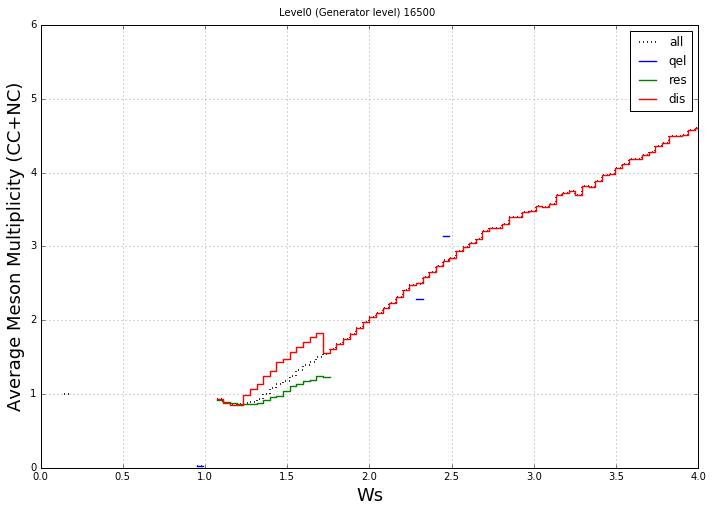

In [21]:
parm_array = np.zeros(len(input_file['cc']))
y_array = np.zeros(len(input_file['cc']))
for x in X_PARMS:
    parm_array += input_file[x]
nan_mask = np.isnan(parm_array)
for y in Y_PARMS:
    y_array += input_file[y]
nan_mask = nan_mask | np.isnan(y_array)
print('{0} nan values'.format(np.sum(nan_mask)))
tot_mask = [~nan_mask]
dis_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['dis'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['dis'][tot_mask]]
)
dis_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['dis'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['dis'][tot_mask]]*(y_array[tot_mask])[input_file['dis'][tot_mask]]
)
res_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['res'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['res'][tot_mask]]
)
res_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['res'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['res'][tot_mask]]*(y_array[tot_mask])[input_file['res'][tot_mask]]
)
qel_hist, edges = np.histogram(
    (parm_array[tot_mask])[input_file['qel'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['qel'][tot_mask]]
)
qel_hist_y, edges = np.histogram(
    (parm_array[tot_mask])[input_file['qel'][tot_mask]], bins=BINNING,
    weights=(weights[tot_mask])[input_file['qel'][tot_mask]]*(y_array[tot_mask])[input_file['qel'][tot_mask]]
)
all_hist, edges = np.histogram(
    parm_array[tot_mask], bins=BINNING,
    weights=weights[tot_mask]
)
all_hist_y, edges = np.histogram(
    parm_array[tot_mask], bins=BINNING,
    weights=weights[tot_mask]*y_array[tot_mask]
)
res_hist_avg = res_hist_y / res_hist.astype(float)
dis_hist_avg = dis_hist_y / dis_hist.astype(float)
qel_hist_avg = qel_hist_y / qel_hist.astype(float)
all_hist_avg = all_hist_y / all_hist.astype(float)
outfile = './images/level'+str(LEVEL)+'/'+X_LABEL+'/'+NAME+'_all'
make_plot_stack((qel_hist_avg, res_hist_avg, dis_hist_avg), all_hist_avg, r'Average Meson Multiplicity (CC+NC)', outfile+'_multiplicity.png')